In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

In [6]:
DATADIR = "C:/Users/My PC/Documents/Python Scripts/CNN/kagglecatsanddogs_3367a/PetImages"
CATEGORIES = ["Dog", "Cat"]

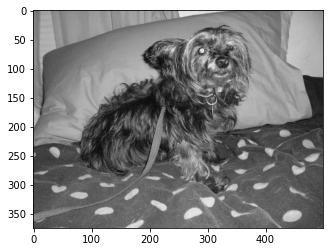

In [7]:
for category in CATEGORIES:
    path = os.path.join(DATADIR, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array, cmap="gray")
        plt.show()
        break
    break
    

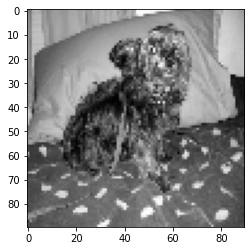

In [9]:
IMG_SIZE = 90

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap = "gray")
plt.show()

In [10]:
training_data = []

def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category)
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                training_data.append([new_array, class_num])
            except Exception as e:
                pass
create_training_data()

In [11]:
print(len(training_data))

24946


In [12]:
import random

random.shuffle(training_data)

In [13]:
for sample in training_data[: 5]:
    print(sample[1])

1
0
1
1
0


In [14]:
X = []
y = []

In [15]:
for features, labels in training_data:
    X.append(features)
    y.append(labels)

x = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

In [48]:
x

array([[[[0.55294118],
         [0.55686275],
         [0.56078431],
         ...,
         [0.64313725],
         [0.63529412],
         [0.6745098 ]],

        [[0.54901961],
         [0.54901961],
         [0.56078431],
         ...,
         [0.66666667],
         [0.6627451 ],
         [0.68235294]],

        [[0.55686275],
         [0.55294118],
         [0.56078431],
         ...,
         [0.61568627],
         [0.67843137],
         [0.66666667]],

        ...,

        [[0.53333333],
         [0.57647059],
         [0.58823529],
         ...,
         [0.42745098],
         [0.45490196],
         [0.47058824]],

        [[0.59607843],
         [0.61568627],
         [0.60784314],
         ...,
         [0.38823529],
         [0.39607843],
         [0.44313725]],

        [[0.6       ],
         [0.57254902],
         [0.57647059],
         ...,
         [0.43921569],
         [0.46666667],
         [0.45882353]]],


       [[[0.79215686],
         [0.82352941],
         [0.79

In [17]:
import pickle

pickle_out = open("X.pickle", "wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("Y.pickle", "wb")
pickle.dump(y, pickle_out)
pickle_out.close()

# ConvoNet

In [21]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

In [22]:
x = x/255.0

model  = Sequential()

model.add(Conv2D(64, (3,3), input_shape = x.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(64, (3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Flatten())
model.add(Dense(64))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss = "binary_crossentropy", optimizer='adam',
              metrics=['accuracy'])

In [24]:
y = np.array(y)

In [25]:
model.fit(x, y, epochs = 10, batch_size = 32, validation_split = 0.1)

Epoch 1/10
702/702 [==============================] - 129s 184ms/step - loss: 0.6586 - accuracy: 0.6163 - val_loss: 0.6147 - val_accuracy: 0.6525
Epoch 2/10
702/702 [==============================] - 134s 190ms/step - loss: 0.5371 - accuracy: 0.7298 - val_loss: 0.5121 - val_accuracy: 0.7547
Epoch 3/10
702/702 [==============================] - 134s 191ms/step - loss: 0.4663 - accuracy: 0.7785 - val_loss: 0.4961 - val_accuracy: 0.7735
Epoch 4/10
702/702 [==============================] - 132s 189ms/step - loss: 0.4213 - accuracy: 0.8066 - val_loss: 0.4938 - val_accuracy: 0.7627
Epoch 5/10
702/702 [==============================] - 134s 190ms/step - loss: 0.3933 - accuracy: 0.8241 - val_loss: 0.4812 - val_accuracy: 0.7756
Epoch 6/10
702/702 [==============================] - 144s 205ms/step - loss: 0.3530 - accuracy: 0.8446 - val_loss: 0.4751 - val_accuracy: 0.7884
Epoch 7/10
702/702 [==============================] - 147s 209ms/step - loss: 0.3201 - accuracy: 0.8584 - val_loss: 0.5082 -

In [30]:
#testing
source = "C:/Users/My PC/Documents/Python Scripts/CNN/kagglecatsanddogs_3367a/PetImages/d.png"

In [41]:
img= cv2.imread(source, cv2.IMREAD_GRAYSCALE)
img

array([[ 21,  21,  21, ...,  28,  28,  28],
       [ 21,  21,  21, ...,  28,  28,  28],
       [ 21,  21,  21, ...,  28,  34,  34],
       ...,
       [182, 178, 173, ..., 122, 118, 133],
       [120, 122, 118, ..., 109, 106, 116],
       [ 66,  66,  43, ...,  93, 106, 112]], dtype=uint8)

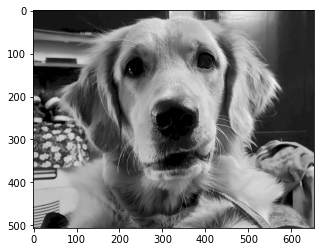

In [42]:
plt.imshow(img, cmap="gray")
plt.show()

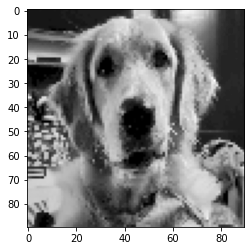

In [45]:
img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
plt.imshow(img, cmap = "gray")
plt.show()

In [47]:
img

array([[ 21,  21,  21, ...,  44,  34,  34],
       [ 21,  21,  21, ...,  43,  34,  34],
       [ 21,  21,  21, ...,  43,  32,  34],
       ...,
       [ 91, 144, 183, ..., 106,  84, 137],
       [119,  76, 172, ..., 121,  84, 138],
       [170, 110,  70, ..., 134, 122, 132]], dtype=uint8)

In [53]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 88, 88, 64)        640       
_________________________________________________________________
activation (Activation)      (None, 88, 88, 64)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 44, 44, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 42, 42, 64)        36928     
_________________________________________________________________
activation_1 (Activation)    (None, 42, 42, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 21, 21, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 28224)             0

In [61]:
img=cv2.imread(source)
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

resized=cv2.resize(img,(IMG_SIZE,IMG_SIZE))

resized=cv2.resize(gray,(IMG_SIZE,IMG_SIZE))
normalized=resized/255.0
reshaped=np.reshape(normalized,(-1,IMG_SIZE,IMG_SIZE,1))
result=model.predict(reshaped)
print(result)

[[0.18183243]]


The picture we have taken has low possibility of being cat.